In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()
api.authenticate()

In [5]:
api.competition_download_file("sentiment-analysis-on-movie-reviews", "train.tsv.zip",path = "./")

  0%|          | 0.00/1.28M [00:00<?, ?B/s]

100%|██████████| 1.28M/1.28M [00:00<00:00, 4.87MB/s]

In [7]:
import zipfile
with zipfile.ZipFile('train.tsv.zip', 'r') as zipref:
    zipref.extractall("./")

In [8]:
import pandas as pd

In [16]:
df = pd.read_csv("train.tsv", sep = "\t").drop_duplicates(subset="SentenceId", keep = "first").reset_index(drop = True)

In [17]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,64,2,"This quiet , introspective and entertaining in...",4
2,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
3,117,4,A positively thrilling combination of ethnogra...,3
4,157,5,Aggressive self-glorification and a manipulati...,1


In [18]:
df.shape

(8529, 4)

/Users/sampathroutu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


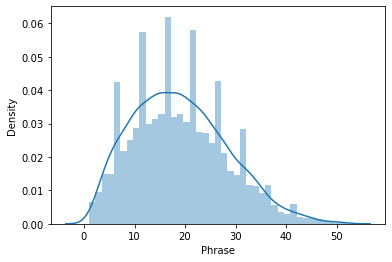

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sequence_length = df['Phrase'].apply(lambda x: len(x.split(" ")))

sns.distplot(sequence_length)

SEQ_LEN = 50

In [24]:
from transformers import AutoTokenizer

In [25]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [33]:
encode_plus = lambda x: tokenizer.encode_plus(x, 
                      max_length= SEQ_LEN,
                      truncation= True,
                      padding= "max_length",
                      return_token_type_ids= False,
                      return_attention_mask= True,
                      return_tensors= "tf"
                     )

In [38]:
encode_plus("good boy")

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[ 101, 1363, 2298,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [52]:
import numpy as np

Xids = np.zeros((df.shape[0], SEQ_LEN))
Xmask = np.zeros((df.shape[0], SEQ_LEN))

for i, item in enumerate(df['Phrase']):
    encode = encode_plus(item)
    Xids[i] = encode['input_ids']
    Xmask[i] = encode['attention_mask']

In [54]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [62]:
arr = df['Sentiment'].values
arr.shape

labels = np.zeros((arr.size, 5))
labels.shape

(8529, 5)

In [64]:
labels[np.arange(arr.size), arr] =1
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [65]:
with open('xids.npy','wb') as f:
    np.save(f, Xids)
with open('xmask.npy','wb') as f:
    np.save(f, Xmask)
with open('labels.npy','wb') as f:
    np.save(f, labels)